In [1]:
%matplotlib widget

In [2]:
import pandas as pd

## 1 Data import and preparation

* `saqc` does not provide data input/output functionality
* Data import is done using the [pandas](https://pandas.pydata.org/) package

To load the data (a csv file), we use the pandas [`read_excel`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) method and provide it:
* the path to the data
* the name of the sheet to read (`sheetname_="raw data"`)
* the name of the column holding the time information (`index_col="time"`)
* the reprsentation of nodata values (`na_values="NV"`)

In [3]:
df_raw = pd.read_excel("data/MAAP2011cor2.1h.xls", sheet_name="raw data", na_values="NV", index_col="time").sort_index()
df_corrected = pd.read_excel("data/MAAP2011cor2.1h.xls", sheet_name="corrected data" , na_values="NV", index_col="date_from").sort_index()

In [4]:
df_raw.head()

flag  eBC[ug/m3]  mass  flow [m3/h
time                                                     
2011-01-01 00:00:15  200000      1.7490  0.15         840
2011-01-01 00:01:15  200000      1.7754  0.15         840
2011-01-01 00:02:15  200000      1.7424  0.16         840
2011-01-01 00:03:15  200000      1.7820  0.16         841
2011-01-01 00:04:15  200000      1.8282  0.16         839

In [5]:
df_corrected.head()

date_to  eBC[ug/m3], percentile 10  \
date_from                                                            
2011-01-01 00:00:00 2011-01-01 01:00:00                    1.72854   
2011-01-01 01:00:00 2011-01-01 02:00:00                    1.91136   
2011-01-01 02:00:00 2011-01-01 03:00:00                    1.87242   
2011-01-01 03:00:00 2011-01-01 04:00:00                    2.26314   
2011-01-01 04:00:00 2011-01-01 05:00:00                    2.34168   

                     eBC[ug/m3], percentile 50  eBC[ug/m3], percentile 90  
date_from                                                                  
2011-01-01 00:00:00                     1.8216                    1.90146  
2011-01-01 01:00:00                     2.0493                    2.17998  
2011-01-01 02:00:00                     2.2143                    2.35026  
2011-01-01 03:00:00                     2.3694                    2.48292  
2011-01-01 04:00:00                     2.5674                    2.70006

## 2 Initializing SaQC

To get started with flagging data, we:
1. Import the package `saqc`
2. Instantiate a [SaQC](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC) object with one or more data sets
3. Assign the generated `SaQC` object to a variable (here called `qc`) for later usage

In [6]:
import saqc

In [7]:
qc = saqc.SaQC([df_raw["eBC[ug/m3]"], df_corrected["eBC[ug/m3], percentile 50"]])

In [8]:
qc.data

                 eBC[ug/m3] |   eBC[ug/m3], percentile 50 | 
=========================== | =========================== | 
2011-01-01 00:00:15  1.7490 | 2011-01-01 00:00:00  1.8216 | 
2011-01-01 00:01:15  1.7754 | 2011-01-01 01:00:00  2.0493 | 
2011-01-01 00:02:15  1.7424 | 2011-01-01 02:00:00  2.2143 | 
2011-01-01 00:03:15  1.7820 | 2011-01-01 03:00:00  2.3694 | 
2011-01-01 00:04:15  1.8282 | 2011-01-01 04:00:00  2.5674 | 
...                     ... | ...                     ... | 
2011-02-17 17:45:20  0.0858 | 2012-01-01 19:00:00     NaN | 
2011-02-17 17:46:20  0.2706 | 2012-01-01 20:00:00     NaN | 
2011-02-17 17:47:20  0.2046 | 2012-01-01 21:00:00     NaN | 
2011-02-17 17:48:20  0.0990 | 2012-01-01 22:00:00     NaN | 
2011-02-17 17:49:20 -0.0264 | 2012-01-01 23:00:00     NaN | 

In [9]:
qc.flags

              eBC[ug/m3] | eBC[ug/m3], percentile 50 | 
======================== | ========================= | 
2011-01-01 00:00:15 -inf |  2011-01-01 00:00:00 -inf | 
2011-01-01 00:01:15 -inf |  2011-01-01 01:00:00 -inf | 
2011-01-01 00:02:15 -inf |  2011-01-01 02:00:00 -inf | 
2011-01-01 00:03:15 -inf |  2011-01-01 03:00:00 -inf | 
2011-01-01 00:04:15 -inf |  2011-01-01 04:00:00 -inf | 
...                  ... |  ...                  ... | 
2011-02-17 17:45:20 -inf |  2012-01-01 19:00:00 -inf | 
2011-02-17 17:46:20 -inf |  2012-01-01 20:00:00 -inf | 
2011-02-17 17:47:20 -inf |  2012-01-01 21:00:00 -inf | 
2011-02-17 17:48:20 -inf |  2012-01-01 22:00:00 -inf | 
2011-02-17 17:49:20 -inf |  2012-01-01 23:00:00 -inf | 

## Plot data

* `SaQC` instances come with a the plotting routine [`plot`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.plot)
* The plots show the data, existing flags and name their origin

In [10]:
# set the appropiate ploit size
saqc.lib.plotting.FIG_KWARGS["figsize"] = (11, 6)

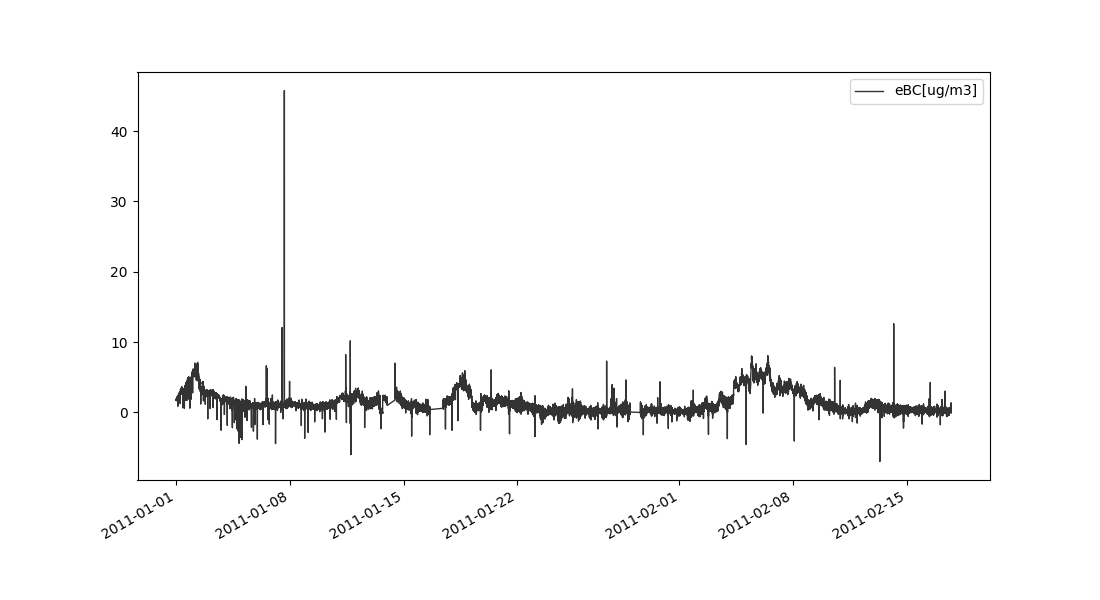

In [11]:
qc.plot("eBC[ug/m3]")

##  Projecting data to a uniform frequency grid

- Most (statistical) data analytics requires the data to be sampled at a uniform sampling rate.
- This dataset contains quite a few gaps and missing values 

In [12]:
qc.data["eBC[ug/m3]"]["2011-01-17 10"]

time
2011-01-17 10:38:13    0.5940
2011-01-17 10:41:14    1.0164
2011-01-17 10:42:14    1.3464
2011-01-17 10:46:12    1.4256
2011-01-17 10:47:12    1.4058
2011-01-17 10:53:13    1.1616
2011-01-17 10:54:13    1.5444
2011-01-17 10:55:13    1.7886
Name: eBC[ug/m3], dtype: float64

The method [`align`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.align):
- generates a reular frequency grid with a resolution of 1 Minute (`freq="1Min!`)
- shifts the values in the original dataset to the respective timestamp in the output without changing it (`method="nshift"`)
- and writed the output to a new variable (`target="eBC_aligned"`)

In [13]:
qc = qc.align("eBC[ug/m3]", target="eBC_aligned", freq="1Min", method="nshift")

In [14]:
qc.data["eBC_aligned"]["2011-01-17 10"].tail(10)

time
2011-01-17 10:50:00       NaN
2011-01-17 10:51:00       NaN
2011-01-17 10:52:00       NaN
2011-01-17 10:53:00    1.1616
2011-01-17 10:54:00    1.5444
2011-01-17 10:55:00    1.7886
2011-01-17 10:56:00       NaN
2011-01-17 10:57:00       NaN
2011-01-17 10:58:00       NaN
2011-01-17 10:59:00       NaN
Freq: T, Name: eBC[ug/m3], dtype: float64

## Flag all NaN values

- With the alignment operation we introduced a lot of `NaN` values
- To ensure, that these do not disturb further calculations, we should flag them

In [15]:
qc.flags["eBC_aligned"]["2011-01-17 10"].tail(10)

time
2011-01-17 10:50:00   -inf
2011-01-17 10:51:00   -inf
2011-01-17 10:52:00   -inf
2011-01-17 10:53:00   -inf
2011-01-17 10:54:00   -inf
2011-01-17 10:55:00   -inf
2011-01-17 10:56:00   -inf
2011-01-17 10:57:00   -inf
2011-01-17 10:58:00   -inf
2011-01-17 10:59:00   -inf
Freq: T, dtype: float64

In [16]:
qc = qc.flagMissing("eBC_aligned")

In [17]:
qc.flags["eBC_aligned"]["2011-01-17 10"].tail(10)

time
2011-01-17 10:50:00    255.0
2011-01-17 10:51:00    255.0
2011-01-17 10:52:00    255.0
2011-01-17 10:53:00     -inf
2011-01-17 10:54:00     -inf
2011-01-17 10:55:00     -inf
2011-01-17 10:56:00    255.0
2011-01-17 10:57:00    255.0
2011-01-17 10:58:00    255.0
2011-01-17 10:59:00    255.0
Freq: T, dtype: float64

## Flag implausible values

* The simple cutoff test [`flagRange`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagRange) sets flags where the data exceeds certain upper and/or lower bounds
* These bounds are variable and controlled by the function's parameter `min` and `max`

In [18]:
qc = qc.flagRange("eBC_aligned", min=0)

In [19]:
qc.plot("eBC_aligned")

## Flag local outliers

* [`flagUniLOF`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagUniLOF) performs an univariate variant of the local outlier factor approach.
* The SaQC documentation provides a brief [`guide`](https://rdm-software.pages.ufz.de/saqc/cookbooks/OutlierDetection.html) into tuning the [`flagUniLOF`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagUniLOF) function.

In [20]:
qcn = qc.flagUniLOF("eBC_aligned", thresh=1.2, n=12)

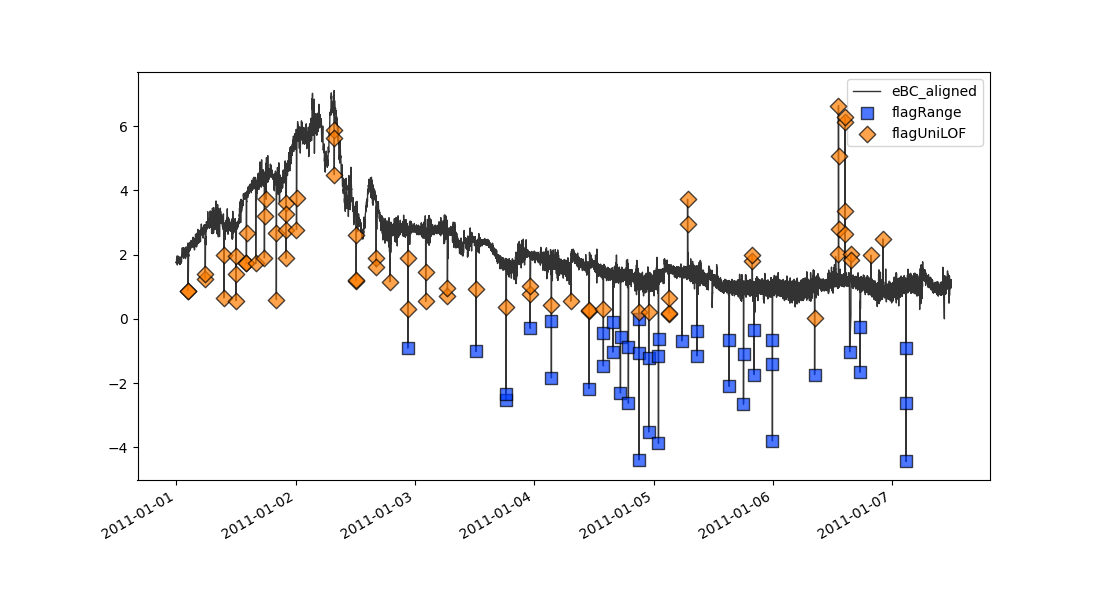

In [21]:
qcn.plot("eBC_aligned", xscope=slice("2011-01-01", "2011-01-07 12:00"))

- while downward spikes are certainly data errors, upward spikes likely have valid causes.
- in order to only flag downward spikes we [combine](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.andGroup) the [outlier detection](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagUniLOF) with a [custom/generic condition](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.flagGeneric).

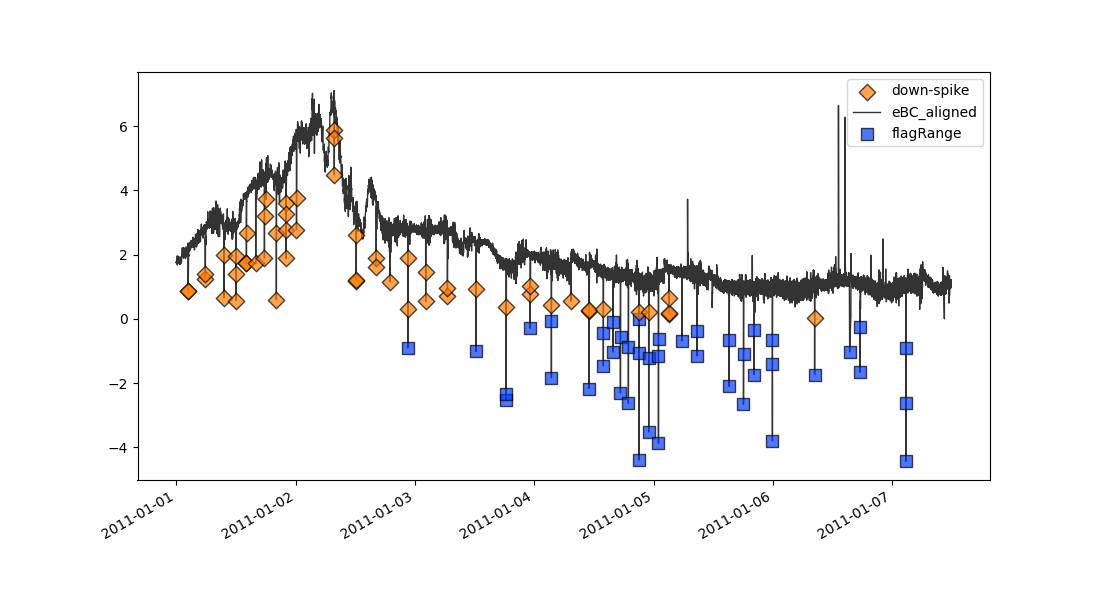

In [22]:
# only flag downward spikes
qcg = qc.andGroup("eBC_aligned", label="down-spike", group=[
         qc.flagUniLOF("eBC_aligned", thresh=1.2, n=12),
         qc.flagGeneric("eBC_aligned", func=lambda x: x < x.rolling("1H").mean())
    ]
)
qcg.plot("eBC_aligned", xscope=slice("2011-01-01", "2011-01-07 12:00"))

## Dealign data

* Finally, the flagging result obtained from the regularly sampled (shifted) version of the data should be projected onto the original data in a plausible way.
* This can be achieved with the [`concatFlags`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.core.SaQC.html#saqc.core.SaQC.concatFlags) function. It tries to invert the projection used for generating the regularly sampled data.

In [23]:
qcn = qcn.concatFlags("eBC_aligned", target="eBC[ug/m3]", method="auto")
qcn.plot("eBC[ug/m3]", xscope=slice("2011-01-01", "2011-01-07 12:00"))

## Process data

- SaQC also provides methods to process data.
- The method [`resample`](https://rdm-software.pages.ufz.de/saqc/_api/saqc.SaQC.html#saqc.SaQC.resample) allows to aggregate data to a different time resolution (`freq="1H!"`) using a custom function (`func=lambda x: x.quantile(.5)`). Any function/method working on a `pd.Series` is allowed.

In [24]:
qcn = qcn.resample("eBC[ug/m3]", target="eBC[ug/m3]_q10", freq="1H", func=lambda x: x.quantile(.1))
qcn = qcn.resample("eBC[ug/m3]", target="eBC[ug/m3]_q50", freq="1H", func=lambda x: x.quantile(.5))
qcn = qcn.resample("eBC[ug/m3]", target="eBC[ug/m3]_q90", freq="1H", func=lambda x: x.quantile(.9))

### Compare with provided data

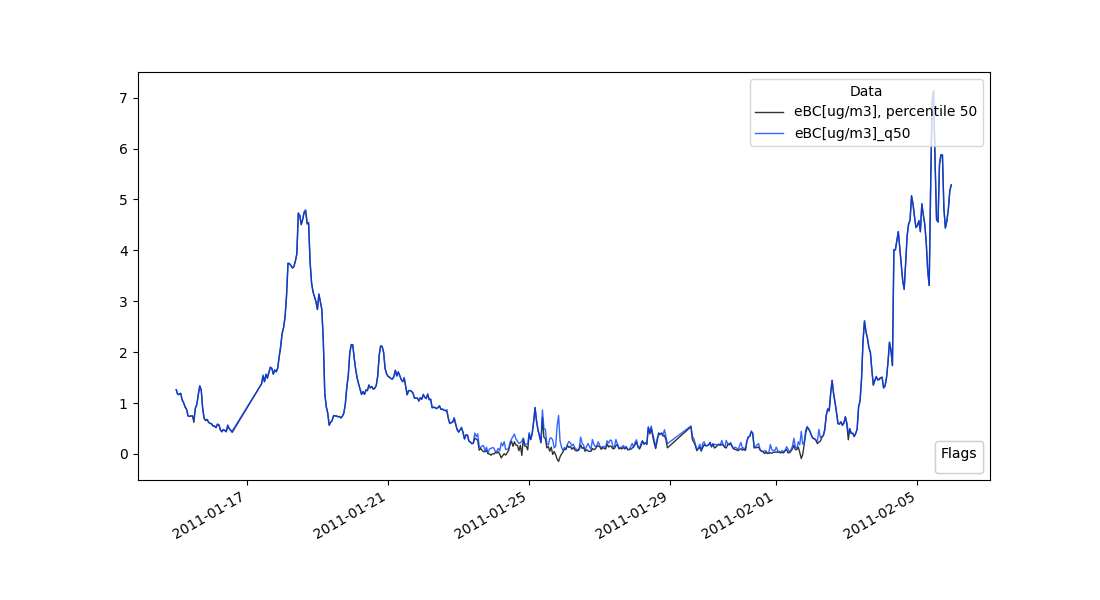

In [25]:
qcn.plot(
    ["eBC[ug/m3], percentile 50", "eBC[ug/m3]_q50"],
    xscope=slice("2011-01-15", "2011-02-05")
)